# Práctica 3: Informe EDA
Eric Salazar Moreira
## Dataset escogido
Para realizar esta práctica he escogido un dataset que contiene datos sobre portátiles de distintas marcas, sus precios, componentes, sistemas operativos... Puesto que hay bastantes correlaciones que pueden ser interesantes de ver. El dataset cuenta con unos 1000 registros (no es excesivamente grande ni pequeño) y 22 columnas (algunas sobrarán), está cogido de Kaggle, se subió hace muy poco a la web, para ser exactos el día 09/03/2024 y todos los datos son actualizados hasta enero de este mismo año, por lo que son bastante exactos.



## Importaciones y carga del dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

df = pd.read_csv('portatiles.csv')

## Exploración inicial del dataframe

In [2]:
## Una vista a la estructura general del dataframe
print(df.head())

   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... secondary_storage_type  secondary_storage_c

In [3]:
## Saber el número total de filas y columnas
num_filas, num_columnas = df.shape
print("Número total de filas:", num_filas)
print("Número total de columnas:", num_columnas)

Número total de filas: 991
Número total de columnas: 22


In [4]:
## Saber el tipo de datos de cada columna
tipos_de_datos = df.dtypes
print(tipos_de_datos)

index                           int64
brand                          object
Model                          object
Price                           int64
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
dtype: object


In [5]:
## Saber si contamos con valores nulos en las columnas
valores_nulos = df.isnull().sum()
print(valores_nulos)

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64


In [6]:
## Un resumen estadístico de las variables numéricas
summary = df.describe()
print(summary)

             index          Price      Rating   num_cores  num_threads  \
count   991.000000     991.000000  991.000000  991.000000   991.000000   
mean    505.860747   77266.504541   63.931382    8.128153    12.191726   
std     287.899458   57384.910269   10.190575    4.215499     5.585115   
min       1.000000    9800.000000   24.000000    2.000000     0.000000   
25%     258.500000   43595.000000   58.000000    6.000000     8.000000   
50%     507.000000   61900.000000   64.000000    8.000000    12.000000   
75%     754.500000   89245.000000   71.000000   10.000000    16.000000   
max    1002.000000  454490.000000   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  991.000000                991.000000                  991.000000   
mean    13.047427                610.938446                    4.004036   
std      5.591188                266.927666                   33.553936   
min      2.000000                

In [7]:
## Contamos si hay algun modelo de portátil repetido
frecuencia_modelos = df['Model'].value_counts()
modelos_repetidos = frecuencia_modelos[frecuencia_modelos > 1]
print(modelos_repetidos)

Series([], Name: count, dtype: int64)


In [8]:
## Ver si en las columnas numéricas hay ceros
columnas_numericas = df.select_dtypes(include=['int', 'float'])
registros_con_0 = (columnas_numericas == 0).sum()
print(registros_con_0)

index                           0
Price                           0
Rating                          0
num_cores                       0
num_threads                     5
ram_memory                      0
primary_storage_capacity        0
secondary_storage_capacity    976
display_size                    0
resolution_width                0
resolution_height               0
dtype: int64


In [9]:
## Ver los valores únicos en las columnas categóricas
columnas_caracteres = df.select_dtypes(include=['object'])
valores_unicos_caracteres = columnas_caracteres.nunique()
print(valores_unicos_caracteres)

brand                      26
Model                     991
processor_brand             4
processor_tier             15
primary_storage_type        2
secondary_storage_type      2
gpu_brand                   5
gpu_type                    3
OS                          7
year_of_warranty            4
dtype: int64


Con esta exploración inicial del dataframe se pueden sacar algunas conclusiones:
1. El dataframe es 100% completo, no cuenta con ningun valor nulo
2. Tenemos datos variados, muchos campos con caracteres y muchos con valores numéricos
3. En el resumen estadístico de las variables numéricas he detectado una anomalía: los precios. Esto me ha hecho revisar la página donde se ha publicado el dataset y los precios tan elevados se deben a que están puestos en rupias indias, por lo que habrá que hacer una transformación.
4. No hay modelos de portátil repetidos
5. Al comprobar los ceros en las columnas numéricas hay un fallo fácil de detectar en la columna "secondary_storage_capacity" y es que hay 976/991 registros que son 0. Por lo que casi ningún portátil del dataframe tiene un segundo disco duro.
6. Tenemos categorías muy variadas, con 26 marcas, 7 tipos de SO, 15 tipos de procesador...

## Eliminación de columnas y renombres


In [10]:
df = df.drop(['index', 'Model', 'secondary_storage_type', 'secondary_storage_capacity', 'year_of_warranty','num_threads'], axis=1)
df.head(2)

,brand,Price,Rating,processor_brand,processor_tier,num_cores,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS
0,tecno,23990,63,intel,core i3,2,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows
1,tecno,35990,67,intel,core i7,4,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows


He decidido eliminar estas columnas porque creo que no aportan ninguna información especial en el conjunto de datos. En el caso del índice, no nos sirve, el modelo tampoco ya que ya está comprobado que todos los portátiles en el dataframe son únicos y los años de garantía dependen de cada marca y país. También he eliminado las columnas que dan información sobre el segundo disco duro, puesto que como se ha comprobado antes, casi ningún modelo tiene un segundo disco, para ser exacto, solamente el 2%. El número de hilos he creído conveniente eliminarlo porque es una información demasiado específica para la información que quiero sacar del conjunto de datos.

In [11]:
df = df.rename(columns={"brand": "Marca", "Price": "Precio", "processor_brand": "Fab_proc", "processor_tier": "Modelo_proc","num_cores": "Nucleos", "ram_memory": "RAM", "primary_storage_type": "Tipo_disco", "primary_storage_capacity":"Cap_disco","gpu_brand":"Fab_grafica","gpu_type":"Tipo_grafica","is_touch_screen":"Tactil","display_size":"Pulgadas","resolution_width":"Ancho_reso","resolution_height":"Alto_reso","OS":"SO" })
df.head(2)

,Marca,Precio,Rating,Fab_proc,Modelo_proc,Nucleos,RAM,Tipo_disco,Cap_disco,Fab_grafica,Tipo_grafica,Tactil,Pulgadas,Ancho_reso,Alto_reso,SO
0,tecno,23990,63,intel,core i3,2,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows
1,tecno,35990,67,intel,core i7,4,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows


He decidido renombrar las columnas para traducirlas al castellano y hacerlas más entendibles para mi uso.

## Conversión de datos

In [12]:
df['Precio'] = df['Precio'] * 0.011
df['Tipo_disco'] = df['Tipo_disco'].replace({'SSD': 1, 'HDD': 0})
df['Tipo_disco'] = df['Tipo_disco'].astype(int)
df['Tactil'] = df['Tactil'].replace({False: 0, True: 1})

C:\Users\Yo\AppData\Local\Temp\ipykernel_23528\1649386968.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tipo_disco'] = df['Tipo_disco'].replace({'SSD': 1, 'HDD': 0})
C:\Users\Yo\AppData\Local\Temp\ipykernel_23528\1649386968.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tactil'] = df['Tactil'].replace({False: 0, True: 1})


En este caso he decidido convertir los datos de precio, puesto que estaba introducido en rupias indias, el cambio a euro es de 0,011 por lo que he hecho la multiplicación para que los precios se reflejen en euros.
También he cambiado a variables binarias los campos Tipo_Disco y Tactil, puesto que en el primero solo están los valores SSD (1) y HDD (0) y en el segundo True o False, siendo de valor numérico será más fácil tratar con ellos en un futuro.

## Identificando outliers


<Axes: xlabel='Precio'>

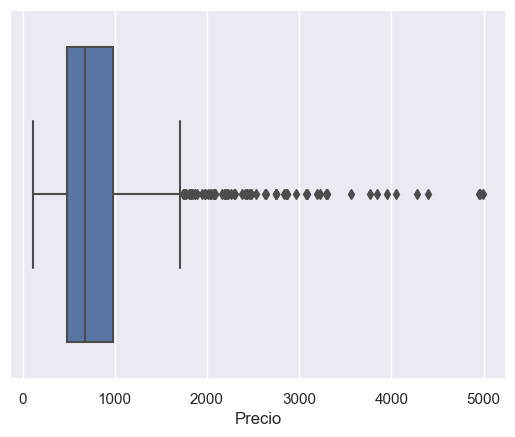

In [13]:
sns.boxplot(x=df['Precio'])

<Axes: xlabel='Rating'>

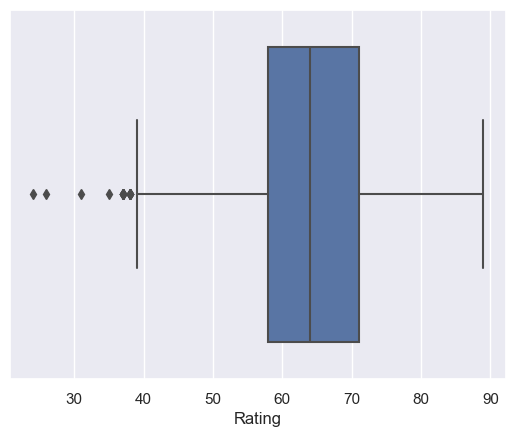

In [14]:
sns.boxplot(x=df['Rating'])

<Axes: xlabel='Nucleos'>

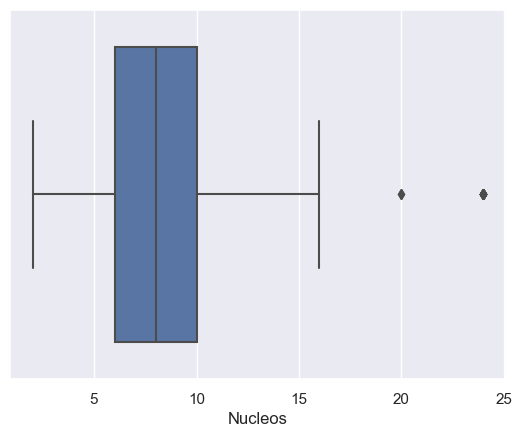

In [15]:
sns.boxplot(x=df['Nucleos'])

<Axes: xlabel='RAM'>

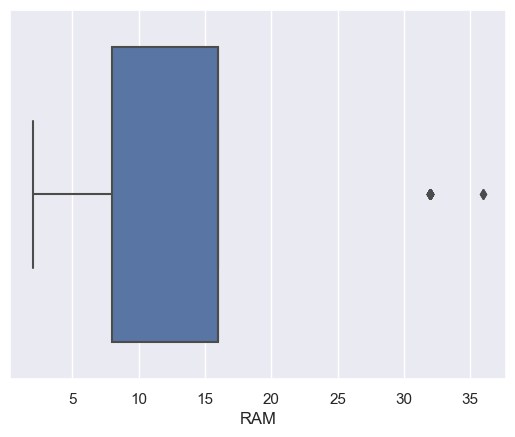

In [16]:
sns.boxplot(x=df['RAM'])

<Axes: xlabel='Cap_disco'>

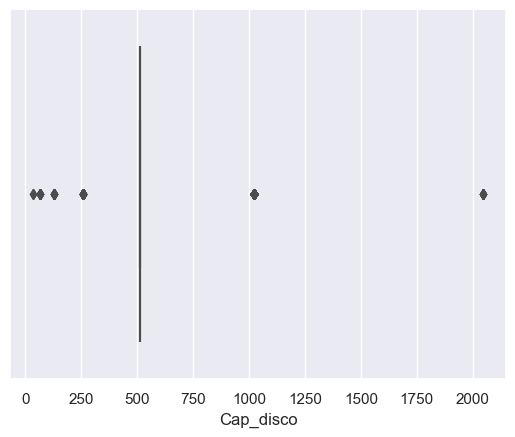

In [17]:
sns.boxplot(x=df['Cap_disco'])

<Axes: xlabel='Pulgadas'>

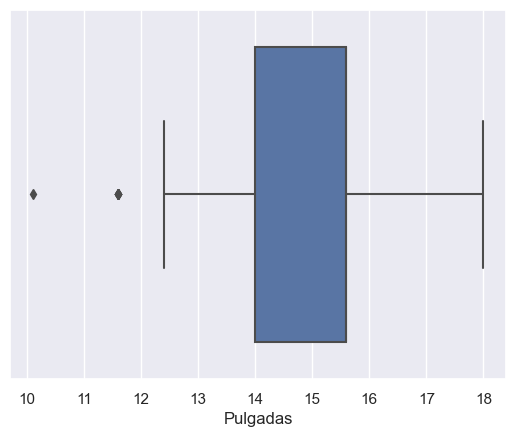

In [18]:
sns.boxplot(x=df['Pulgadas'])

<Axes: xlabel='Alto_reso'>

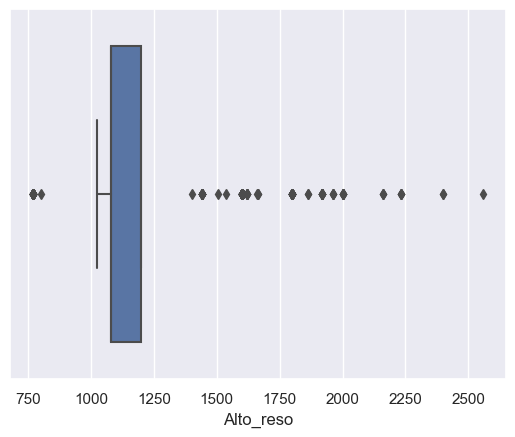

In [19]:
sns.boxplot(x=df['Alto_reso'])

He realizado un boxplot para cada variable numérica del dataframe para poder detectar valores extremos o mal puestos. En este caso no hay ningún dato que se salga de los límites de forma exagerada y que deba alertarnos. Todos los cuantiles se mueven en rangos con sentido respecto a las características del portátil que representan.

## Visualización de la distribución de variables

Text(0.5, 0, 'Marca')

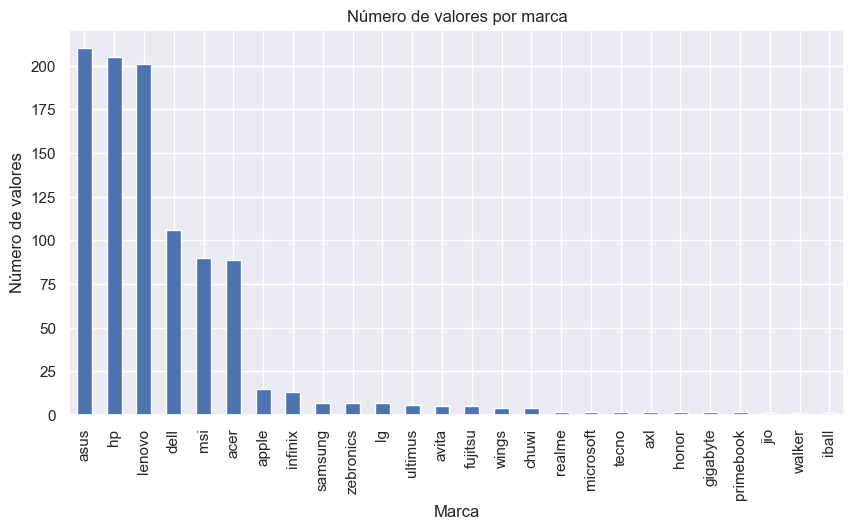

In [20]:
df.Marca.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por marca")
plt.ylabel('Número de valores')
plt.xlabel('Marca')

Se puede ver que predominan las marcas principales en cuanto a la fabricación de portátiles, con una gran densidad de datos en Asus, HP y Lenovo, seguidas de Dell, Msi y Acer. Es una distribución bastante normal, puesto que las marcas predominantes son las que más portátiles sacan al mercado y por ende, más modelos suyos tenemos en el dataset. Apple, por ejemplo, es una marca principal, evidentemente, pero tiene muchos menos modelos en el mercado.

Text(0.5, 0, 'Fabricante')

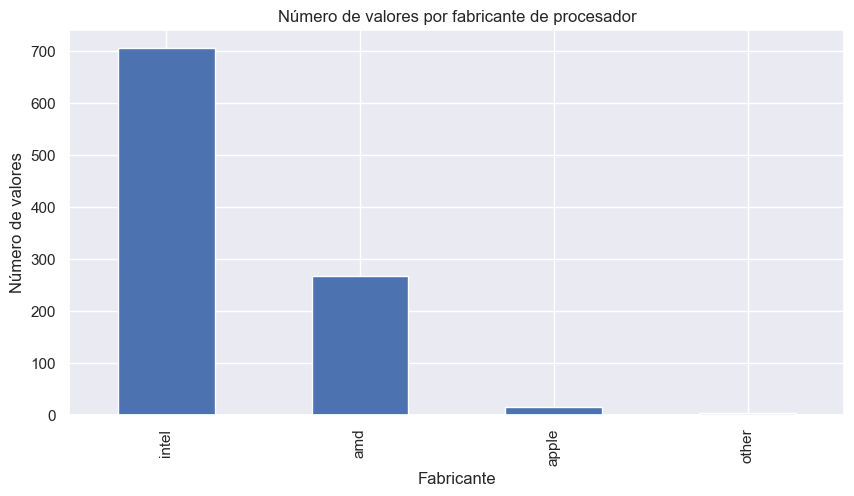

In [21]:
df.Fab_proc.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por fabricante de procesador")
plt.ylabel('Número de valores')
plt.xlabel('Fabricante')

Otra distribución bastante esperada y lógica, puesto que aunque a día de hoy AMD es una competencia muy digna de Intel, un porcentaje algo más alto de ordenadores portátiles siguen teniendo procesadores Intel. En el caso de Apple, es normal el resultado, puesto que solo sus pocos modelos en el conjunto de datos cuentan con procesadores Apple.

Text(0.5, 0, 'Fabricante')

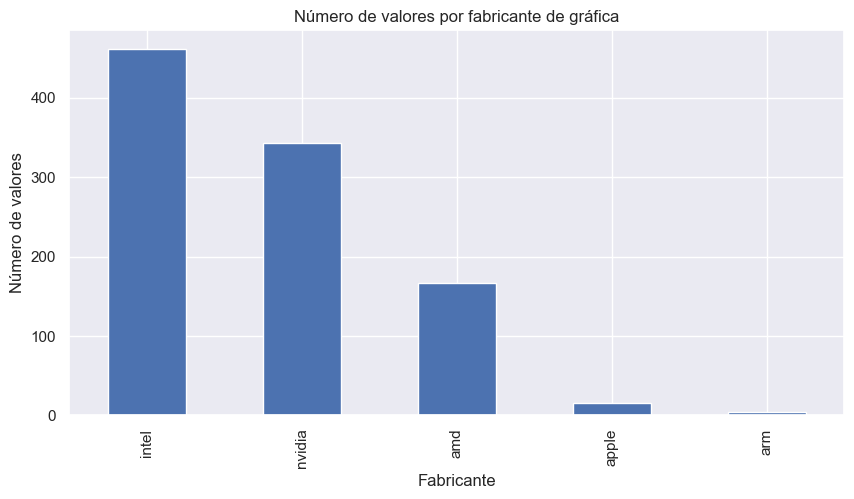

In [22]:
df.Fab_grafica.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por fabricante de gráfica")
plt.ylabel('Número de valores')
plt.xlabel('Fabricante')

Esta distribución tiene sentido, puesto que en el dataframe hay más portátiles con gráfica integrada que dedicada, y nvidia solamente crea gráficas dedicadas, el resto están repartidas entre intel y amd, dependiendo del fabricante del procesador.

Text(0.5, 0, 'Tipo de gráfica')

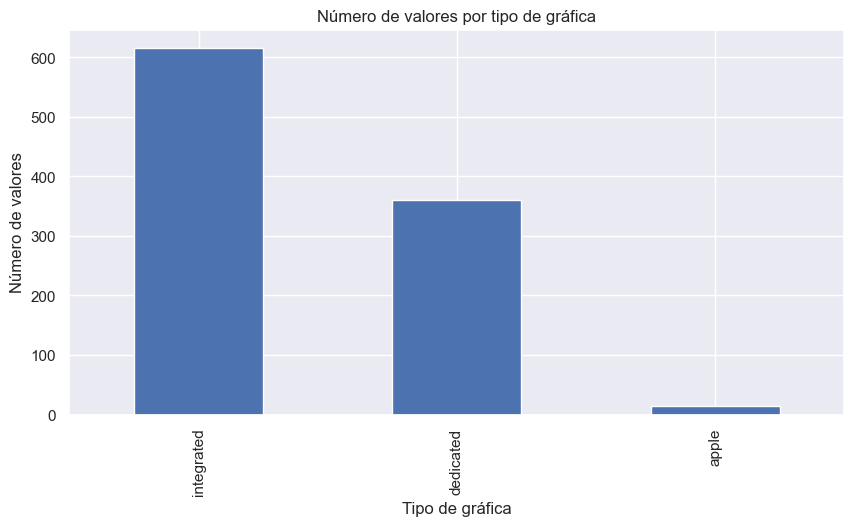

In [23]:
df.Tipo_grafica.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por tipo de gráfica")
plt.ylabel('Número de valores')
plt.xlabel('Tipo de gráfica')

Tenemos una dominancia en portátiles con gráfica integrada, es normal puesto que los portátiles para tareas más generales o cotidianas (los que más abundan), no suelen contar con gráfica dedicada. El caso de Apple, como con todo, es especial, puesto que solo tienen gráfica Apple los portátiles de su marca.

Text(0.5, 0, 'Sistema operativo')

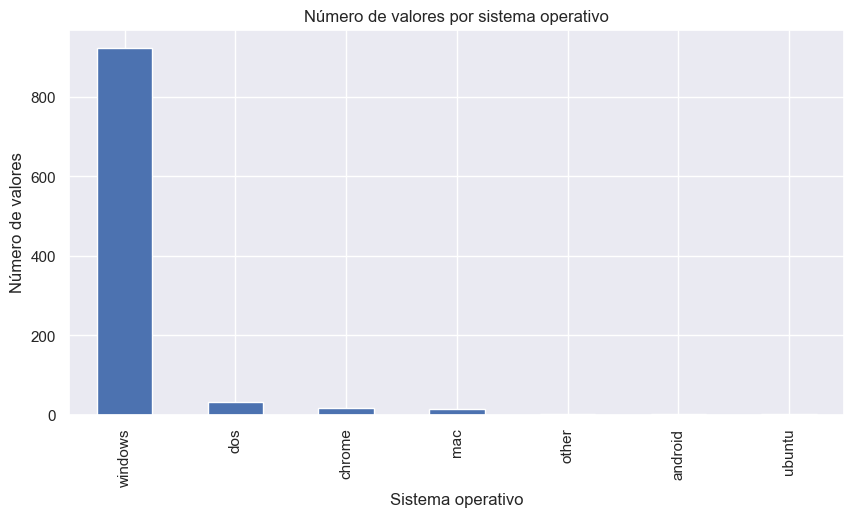

In [24]:
df.SO.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por sistema operativo")
plt.ylabel('Número de valores')
plt.xlabel('Sistema operativo')

En este caso no hay duda que lo más normal era visualizar una gráfica como esta, ya que a día de hoy la dominancia del sistema Windows en todos los portátiles sigue siendo inmensa.

Text(0.5, 0, 'Modelo de procesador')

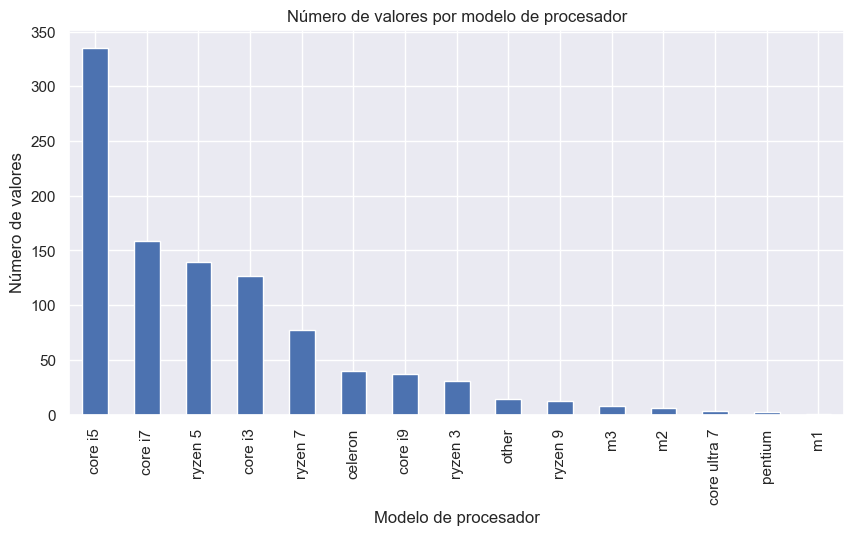

In [25]:
df.Modelo_proc.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por modelo de procesador")
plt.ylabel('Número de valores')
plt.xlabel('Modelo de procesador')

En el caso de los modelos de procesador, se ve una clara dominancia del intel core i5, seguido de i7, ryzen 5, i3 y ryzen7. Estos a día de hoy son los modelos que más encontramos en portátiles, después vienen modelos algo más desfasados, como celeron, o más especiales, como el i9 o el ryzen 9, los cuales encontramos en menos portátiles debido a que se suelen utilizar para tareas más específicas.

Text(0.5, 0, 'Gigas de memoria RAM')

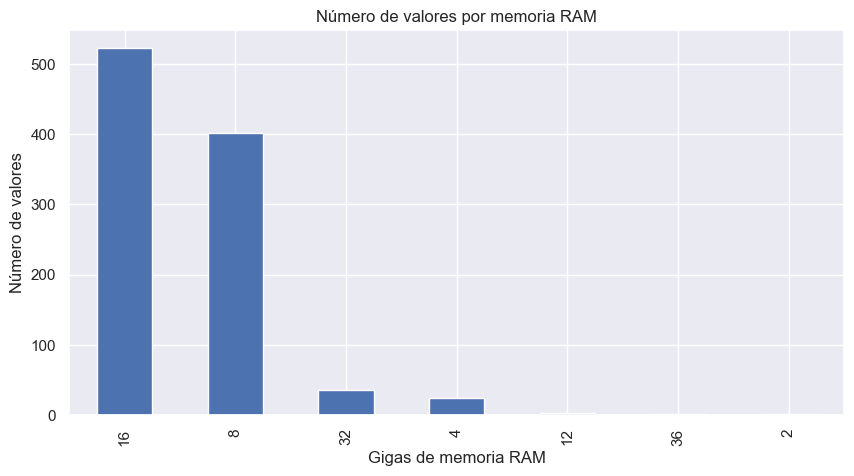

In [26]:
df.RAM.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de valores por memoria RAM")
plt.ylabel('Número de valores')
plt.xlabel('Gigas de memoria RAM')

Podemos ver predominancia en los portátiles de 16GB de RAM, puesto que es la configuración de RAM más frecuente hoy en día en portátiles, seguida de 8GB. El resto de configuraciones tienen mucho menos densidad, pocos portátiles hoy en día siguen contando con solamente 4GB de RAM, y más de 16GB suele verse en portátiles algo más especiales (gaming por ejemplo).

## Correlación entre variables

### Mapa de calor

Una vista general a las correlaciones entre las variables (numéricas) del dataframe.

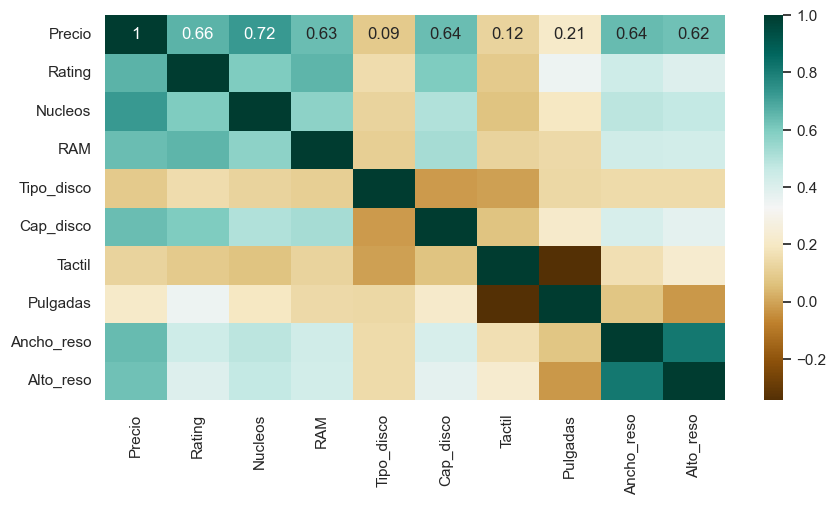

In [27]:
df_numeric = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(10, 5))
corr = df_numeric.corr()
sns.heatmap(corr, cmap="BrBG", annot=True)

plt.show()

Se puede observar que donde más correlación encontramos es en el precio de los portátiles en relación a sus características: Núcleos, RAM, capacidad de disco, resolución... También se puede ver que hay otras características que no son tan importantes, como el táctil en la pantalla, las pulgadas o el tipo de disco. En el caso del tipo de disco y la pantalla táctil, es normal que nos aparezca una correlación muy baja, puesto que muy pocos registros (menos de un 3%) del dataframe tienen pantalla táctil o disco HDD.
Las valoraciones (rating), también tienen cierta relación con algunos componentes, como la RAM,los núcleos o la capacidad de disco.
El resto de relaciones entre las variables son algo más débiles o incluso algunas negativas.

### Gráficos de dispersión

Análisis de las relaciones entre variables de forma más precisa.

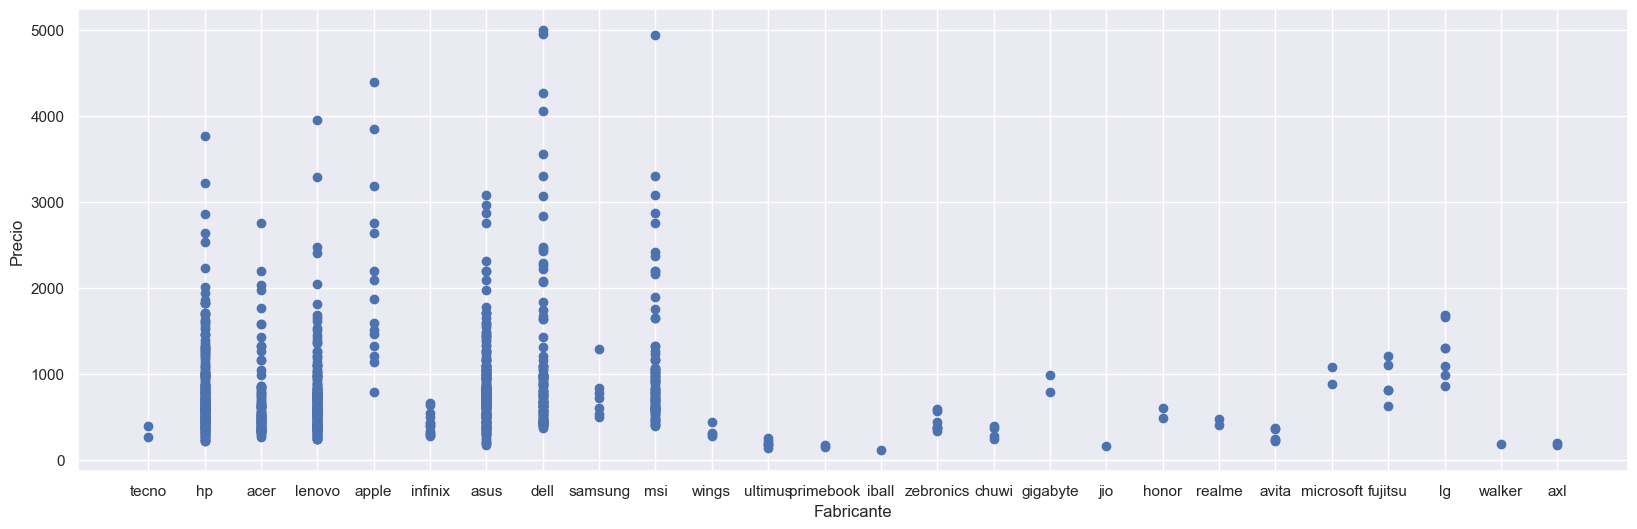

In [28]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(df['Marca'], df['Precio'])
ax.set_xlabel('Fabricante')
ax.set_ylabel('Precio')
plt.show()

Se puede observar poca relación entre las marcas y sus precios. Solamente las marcas más dominantes tienen modelos más caros, MSI y Dell llegan a los precios más altos con algo de diferencia respecto a las otras marcas. Otra observación es que la marca Apple, Gigabyte, Microsoft y LG son marcas que noo tienen modelos especialmente económicos, su suelo es más elevado que el del resto de marcas.

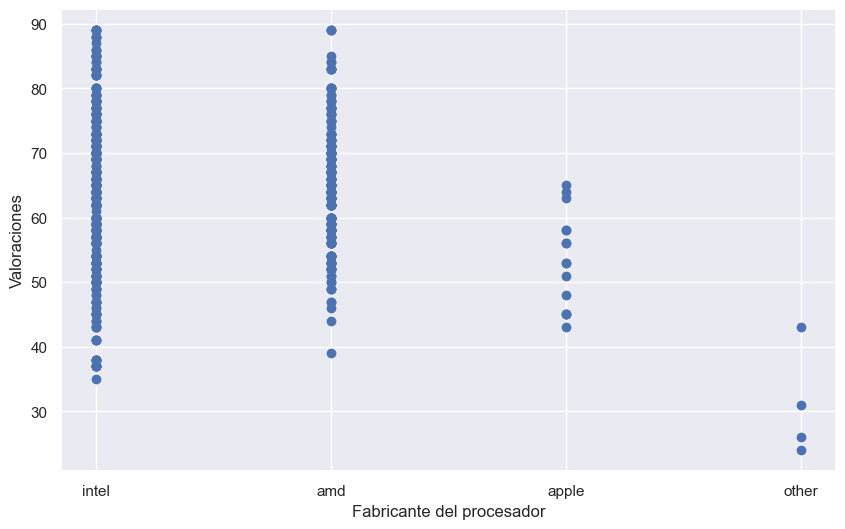

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fab_proc'], df['Rating'])
ax.set_xlabel('Fabricante del procesador')
ax.set_ylabel('Valoraciones')
plt.show()

En el caso de las valoraciones en relación al fabricante del procesador, se puede ver que AMD e Intel tienen valoraciones parecidas, aunque Intel llega a tener valoraciones algo más bajas, pero también tiene mucha más densidad en valoraciones por encima del 80. En el caso de Apple, sus valoraciones no pasan del 67, son mucho inferiores a las de AMD e Intel. Para el resto de fabricantes sus valoraciones son las mínimas y no llegan al aprobado.

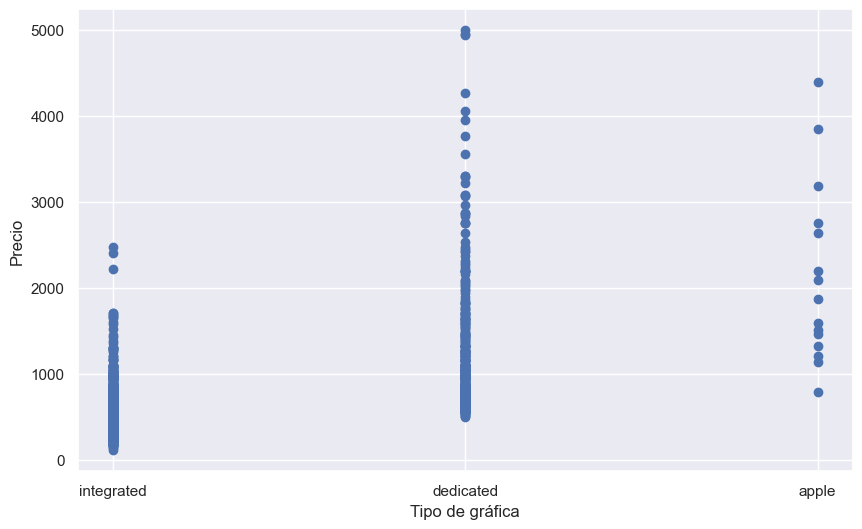

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Tipo_grafica'], df['Precio'])
ax.set_xlabel('Tipo de gráfica')
ax.set_ylabel('Precio')
plt.show()

Se puede observar una relación bastante fuerte entre el tipo de gráfica y el precio de los portátiles, evidentemente los portátiles con gráfica integrada no llegan a tener precios elevados, mientras que los que cuentan con gráfica dedicada o son de apple llegan a doblar los precios máximos de estos. Los que cuentan con Apple, como ya se había visto en la gráfica de marcas, tienen el suelo más elevado.

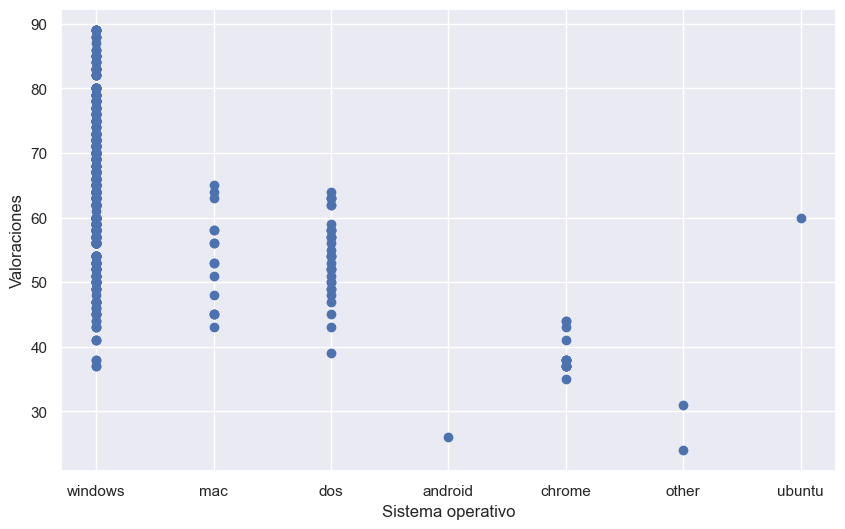

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['SO'], df['Rating'])
ax.set_xlabel('Sistema operativo')
ax.set_ylabel('Valoraciones')
plt.show()

En este gráfico se ve una relación muy fuerte entre el sistema operativo del portátil y sus valoraciones, donde solamente los portátiles con Windows superan valoraciones de 67. Android y otros sistemas cuentan con las valoraciones más bajas y MAC y Dos tienen valoraciones muy pares.

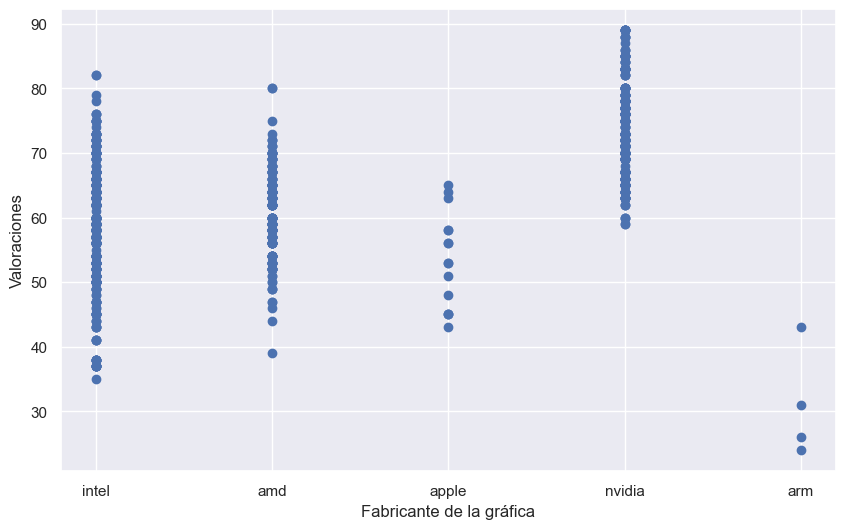

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fab_grafica'], df['Rating'])
ax.set_xlabel('Fabricante de la gráfica')
ax.set_ylabel('Valoraciones')
plt.show()

En este gráfico se puede ver que los portátiles con tarjetas gráficas de Nvidia cuentan con las valoraciones más altas. Esto es algo normal, puesto que anteriormente, en el mapa de calor, también se ha visto una relación entre el precio y las valoraciones, y los portátiles con tarjeta Nvidia (dedicada), son más caros. En el caso de de AMD e Intel (gráficas integradas), las valoraciones son algo más bajas, igual que su precio. Apple tiene valoraciones iguales que en el resto de gráficos, ya que representan a los mismos modelos. Los portátiles con gráficas ARM no llegan a aprobar en las valoraciones.

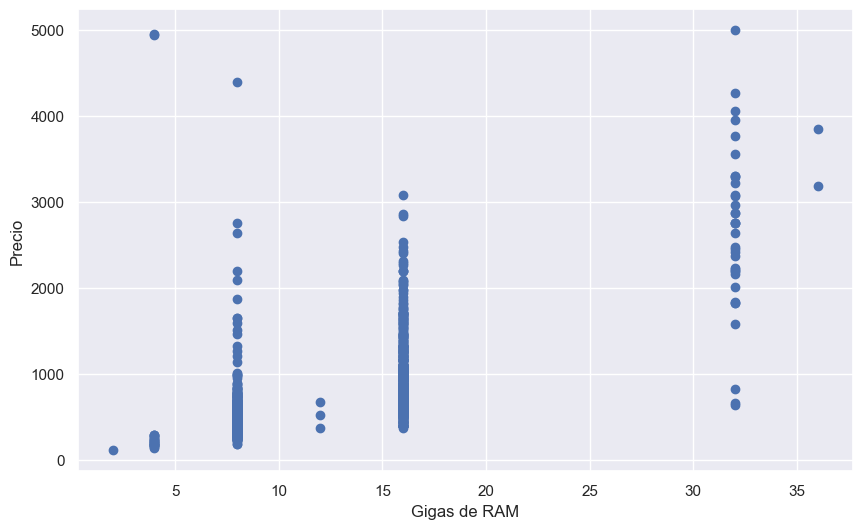

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['RAM'], df['Precio'])
ax.set_xlabel('Gigas de RAM')
ax.set_ylabel('Precio')
plt.show()

En este gráficos se puede ver una relación algo clara entre la RAM y el precio, viendo la dominancia de precios altos en portátiles con más GB de RAM. También alerta que hay un punto muy alto en 4GB de RAM, lo cual es algo bastante raro y tendría que revisarse.

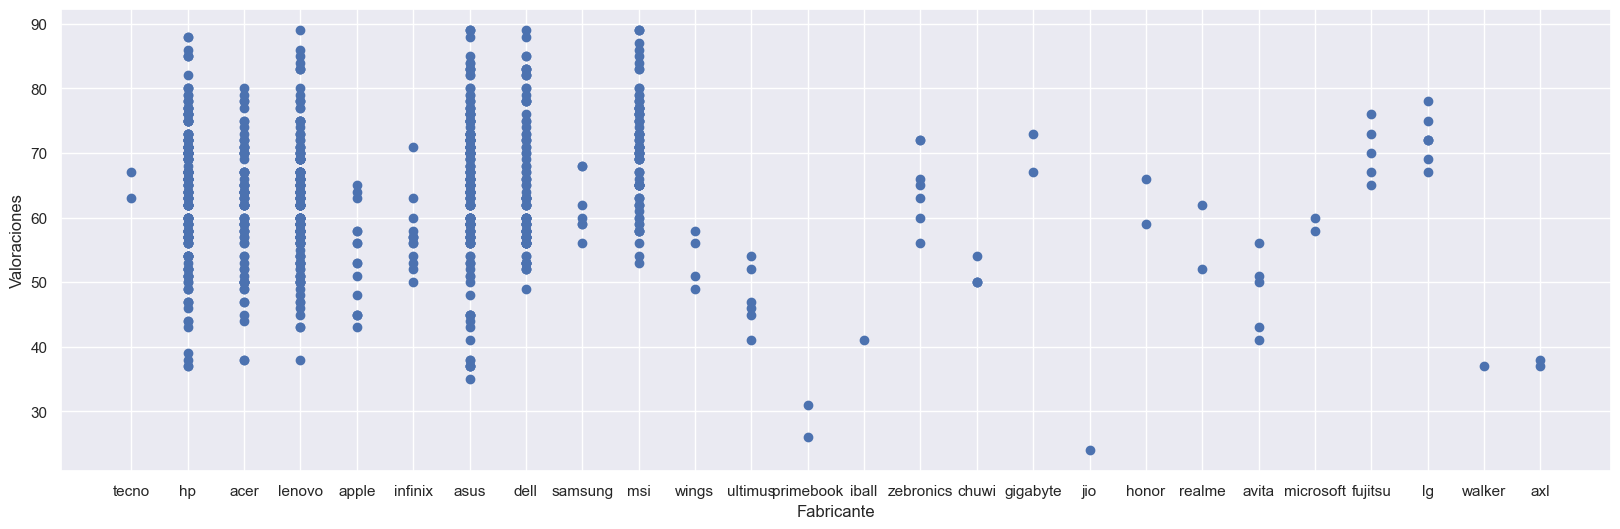

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(df['Marca'], df['Rating'])
ax.set_xlabel('Fabricante')
ax.set_ylabel('Valoraciones')
plt.show()

Podemos ver que existe una relación clara entre las marcas fabricantes de portátiles y sus valoraciones, solamente las marcas predominantes llegan a las valoraciones más altas, al igual que en el gráfico de relación entre marca y precio.

## Conclusiones

Hay varios puntos destacables para las conclusiones de este informe EDA.  
Primero de todo, la completitud del dataset era perfecta, puesto que no contaba con ningún valor nulo, salvo valores 0 en el caso de los portátiles con segundo disco duro, pero era justificado ya que no contaban con disco.  
La precisión del conjunto de datos es muy buena todos los gráficos de correlación y los diagramas de distribución tienen sentido, no hay datos fuera de los extremos y todos los registros tienen sentido, lo cual se ha podido comprobar al observar la relación entre variables.  
La credibilidad de los datos una vez analizados es alta, puesto que concuerdan con el panorama actual en el mundo de los portátiles, el dataset original está publicado el día 09/03/2024 y los datos son actualizados de enero de este mismo año, por lo que siguen siendo muy parecidos o iguales a día de hoy.
En conclusión, el conjunto de datos es muy adecuado para trabajar con él y sacar conclusiones interesantes que ayuden a entender mejor la situación de los portátiles, sus marcas, valoraciones, características...